In [1]:
import sys
sys.path.append('./src/')
sys.path.append('./music/')
import muser as ms
import genetic_algorithm as ga
import matplotlib.pyplot as plt

Piano key frequencies (for equal temperament):
Key number	Scientific name	Frequency (Hz)
         1	             A0	         27.50
         2	            A#0	         29.14
         3	             B0	         30.87
         4	             C1	         32.70
         5	            C#1	         34.65
         6	             D1	         36.71
         7	            D#1	         38.89
         8	             E1	         41.20
         9	             F1	         43.65
        10	            F#1	         46.25
        11	             G1	         49.00
        12	            G#1	         51.91
        13	             A1	         55.00
        14	            A#1	         58.27
        15	             B1	         61.74
        16	             C2	         65.41
        17	            C#2	         69.30
        18	             D2	         73.42
        19	            D#2	         77.78
        20	             E2	         82.41
        21	             F2	         87.31
        22	            F#2	  

In [2]:
ga_classical = ga.GeneticAlgorithm(population_size=200, generations=50, mutation_rate=0.6, individual_length=44)
best_composition, bass_composition, fitnesses = ga_classical.run()

muser = ms.Muser()
muser.generate([best_composition, bass_composition])

Generation 1, Best Fitness: 90
Generation 2, Best Fitness: 93
Generation 3, Best Fitness: 94
Generation 4, Best Fitness: 94
Generation 5, Best Fitness: 97
Generation 6, Best Fitness: 99
Generation 7, Best Fitness: 100
Generation 8, Best Fitness: 100
Generation 9, Best Fitness: 100
Generation 10, Best Fitness: 102
Generation 11, Best Fitness: 103
Generation 12, Best Fitness: 104
Generation 13, Best Fitness: 106
Generation 14, Best Fitness: 106
Generation 15, Best Fitness: 106
Generation 16, Best Fitness: 106
Generation 17, Best Fitness: 107
Generation 18, Best Fitness: 109
Generation 19, Best Fitness: 109
Generation 20, Best Fitness: 110
Generation 21, Best Fitness: 110
Generation 22, Best Fitness: 110
Generation 23, Best Fitness: 111
Generation 24, Best Fitness: 111
Generation 25, Best Fitness: 112
Generation 26, Best Fitness: 112
Generation 27, Best Fitness: 114
Generation 28, Best Fitness: 114
Generation 29, Best Fitness: 114
Generation 30, Best Fitness: 114
Generation 31, Best Fitne

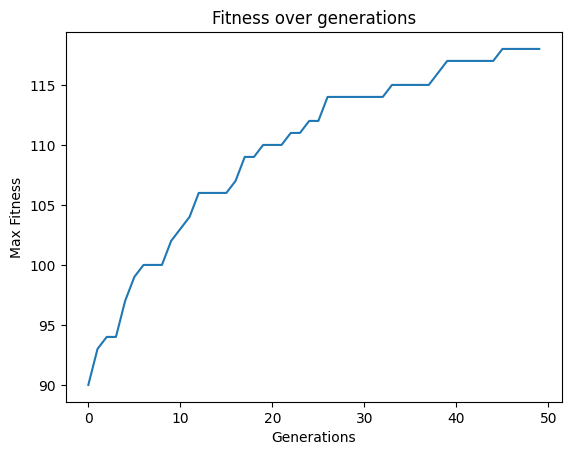

In [3]:
plt.plot(fitnesses)
plt.xlabel('Generations')
plt.ylabel('Max Fitness')
plt.title('Fitness over generations')
plt.show()